# Part I - (Ford GoBike System Dataset Exploration)
## by (Salvation Peter)

## Introduction

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. I would be exploring this data, to understand it better as well as answer basic questions such as 

- When are most trips taken in terms of time of day, day of the week, or month of the year?


- How long does the average trip take? and


- Does the above depend on if a user is a subscriber or customer?




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Loading dataset

df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


Observing the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

Changing the data type of the start_time and end_time

In [4]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

print(df['start_time'].dtype)
print(df['end_time'].dtype)

datetime64[ns]
datetime64[ns]


Changing the datatype of the start and end station_ids as well as the bike ids and member_birth_year

In [5]:
df['start_station_id'] = df['start_station_id'].astype(str)
df['end_station_id'] = df['end_station_id'].astype(str)
df['bike_id'] = df['bike_id'].astype(str)

print(df['start_station_id'].dtype)
print(df['end_station_id'].dtype)
print(df['bike_id'].dtype)

object
object
object


In [6]:
df['member_birth_year'] = pd.to_datetime(df['member_birth_year'], format='%Y')
df['member_birth_year']

df['member_birth_year'].dtype

dtype('<M8[ns]')

In [7]:
df.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude
count,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000
mean,726.078435,37.771223,-122.352664,37.771427,-122.352250
std,1794.389780,0.099581,0.117097,0.099490,0.116673
min,61.000000,37.317298,-122.453704,37.317298,-122.453704
25%,325.000000,37.770083,-122.412408,37.770407,-122.411726
50%,514.000000,37.780760,-122.398285,37.781010,-122.398279
75%,796.000000,37.797280,-122.286533,37.797320,-122.288045
max,85444.000000,37.880222,-121.874119,37.880222,-121.874119


In [8]:
# Confirming the changes applied to the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

In [9]:
# Creating new column to hold the day_name

df['Day'] = df['start_time'].dt.day_name()

In [10]:
df['duration_sec'].mean()

726.078435434977

In [11]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984-01-01,Male,No,Thursday
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaT,NaN,No,Thursday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972-01-01,Male,No,Thursday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989-01-01,Other,No,Thursday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974-01-01,Male,Yes,Thursday


### What is the structure of your dataset?

> The Ford GoBike System data consists of 183412 records with a total of 16 columns; 3 datetime columns, 4 float columns, 1 integer column and 8 object columns. Each of this columns give an information regarding each ride such as which bike was used, where was the starting point and ending point, how long did the ride take, etc. These information would be looked at in this exploratory analysis.

### What is/are the main feature(s) of interest in your dataset?

> The main features in this dataset includes duration_sec, start and end station_id.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> To help us gain much understanding about the rides features such as user type, member birth year, gender as well as the bike share for all trip would be useful features. Also, I created a new column "Day" to help gain more insight on the main features.

## Univariate Exploration

Let's begin by looking at the each column

<ipython-input-12-a326631edbc9>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax);


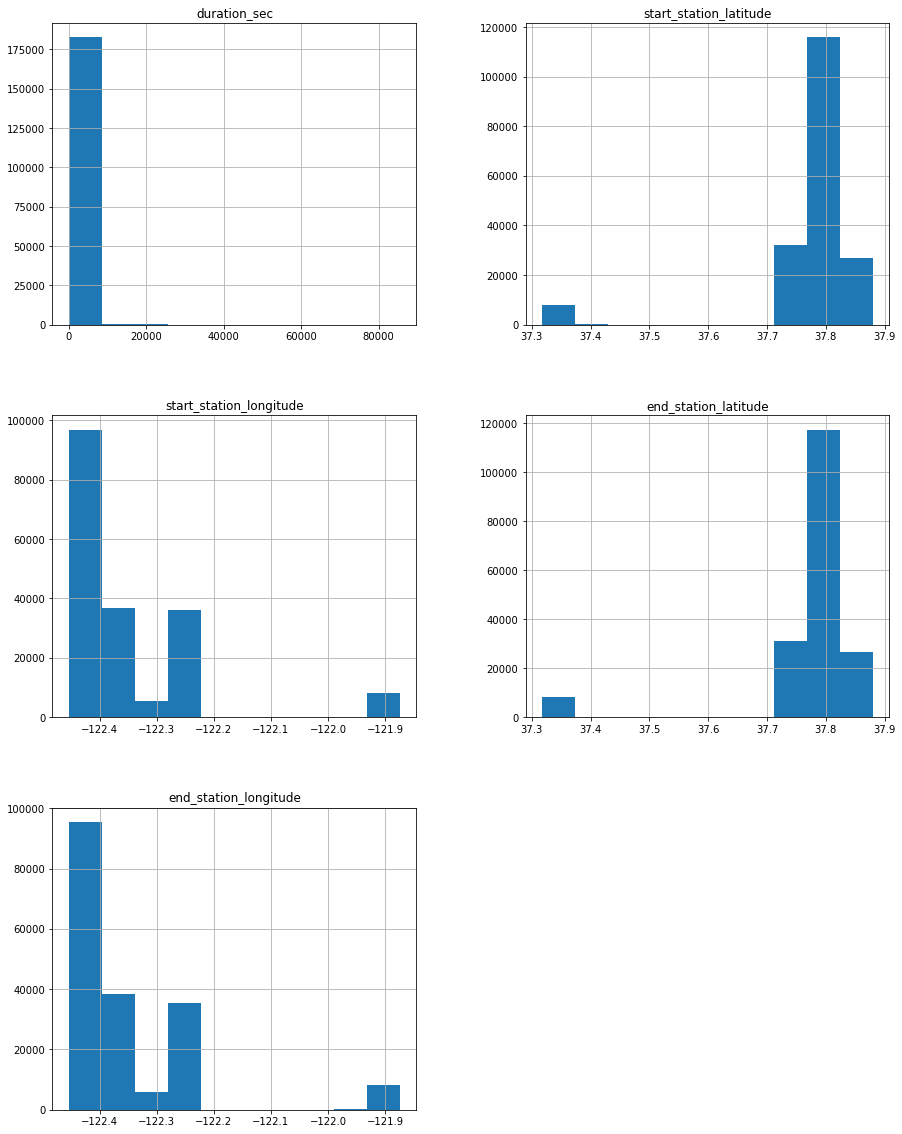

In [12]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax);
# plt.xlabel('Values');
# plt.ylabel('Count');

In [13]:
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                          object
member_birth_year          datetime64[ns]
member_gender                      object
bike_share_for_all_trip            object
Day                                object
dtype: object

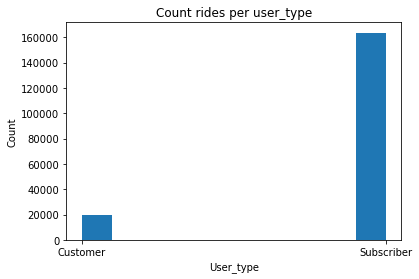

In [14]:
df['user_type'].hist();
plt.grid(False);
plt.xlabel('User_type');
plt.ylabel('Count');
plt.title('Count rides per user_type');

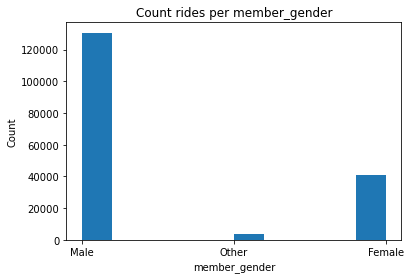

In [15]:
df['member_gender'].hist();
plt.grid(False);
plt.xlabel('member_gender');
plt.ylabel('Count');
plt.title('Count rides per member_gender');

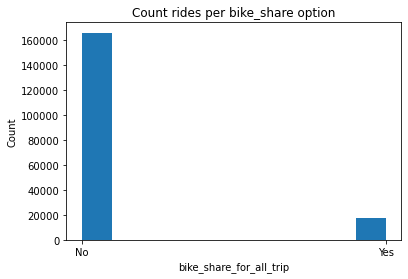

In [16]:
df['bike_share_for_all_trip'].hist();
plt.grid(False);
plt.xlabel('bike_share_for_all_trip');
plt.ylabel('Count');
plt.title('Count rides per bike_share option');

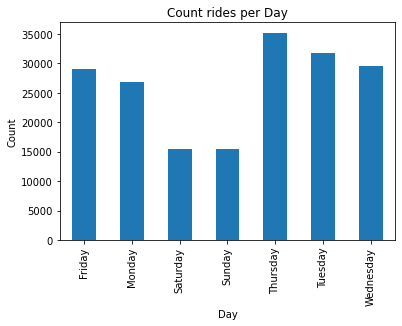

In [17]:
df_day = df.groupby('Day')['duration_sec'].count()

df_day.plot(kind='bar');
plt.grid(False);
plt.xlabel('Day');
plt.ylabel('Count');
plt.title('Count rides per Day');

In [18]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip', 'Day'],
      dtype='object')

## Does the start_station or end_station influence the number of rides?

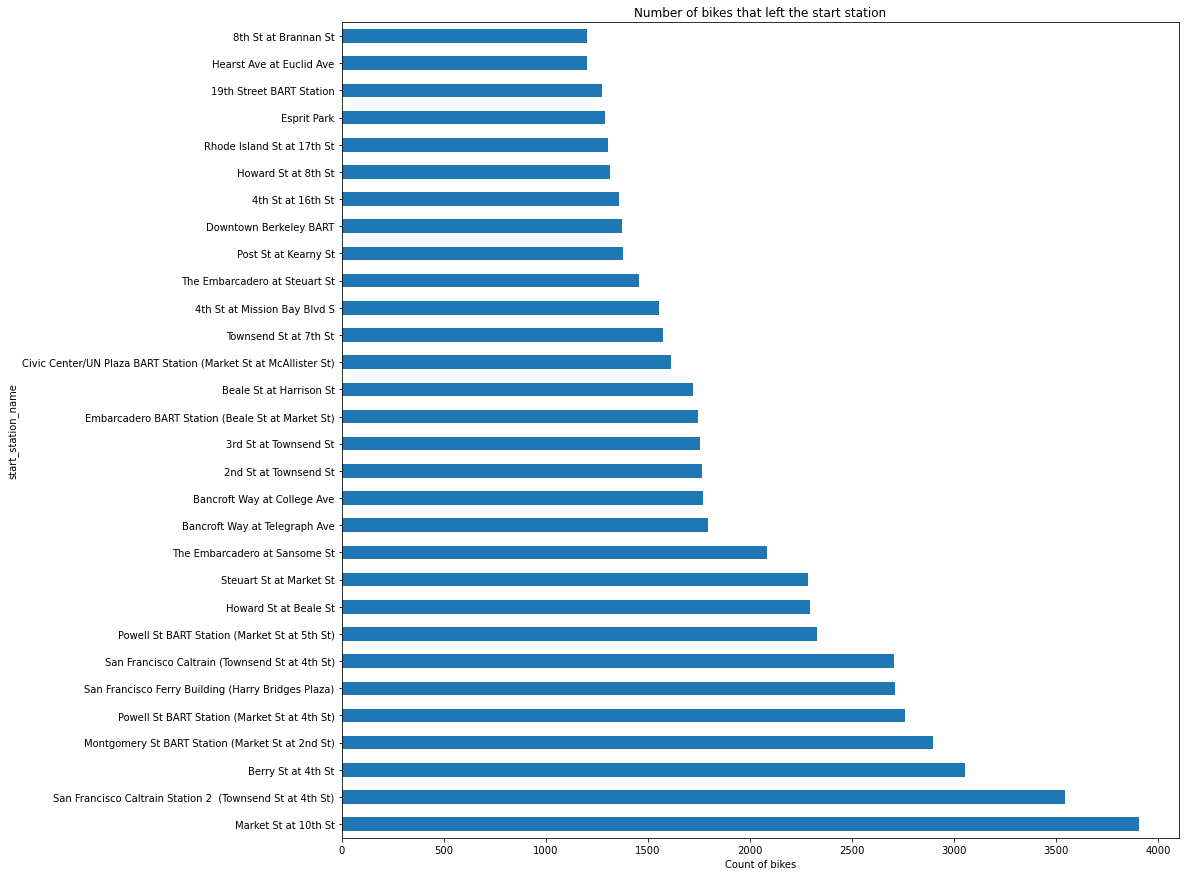

In [19]:
# Top 30 stations with the highest number of bikes leaving from them

fig = plt.figure(figsize = (15,15))
ax = fig.gca()
df.groupby(['start_station_name'])['duration_sec'].count().sort_values(ascending=False)[:30].plot(kind='barh', ax=ax)
plt.xlabel('Count of bikes')
plt.title('Number of bikes that left the start station');

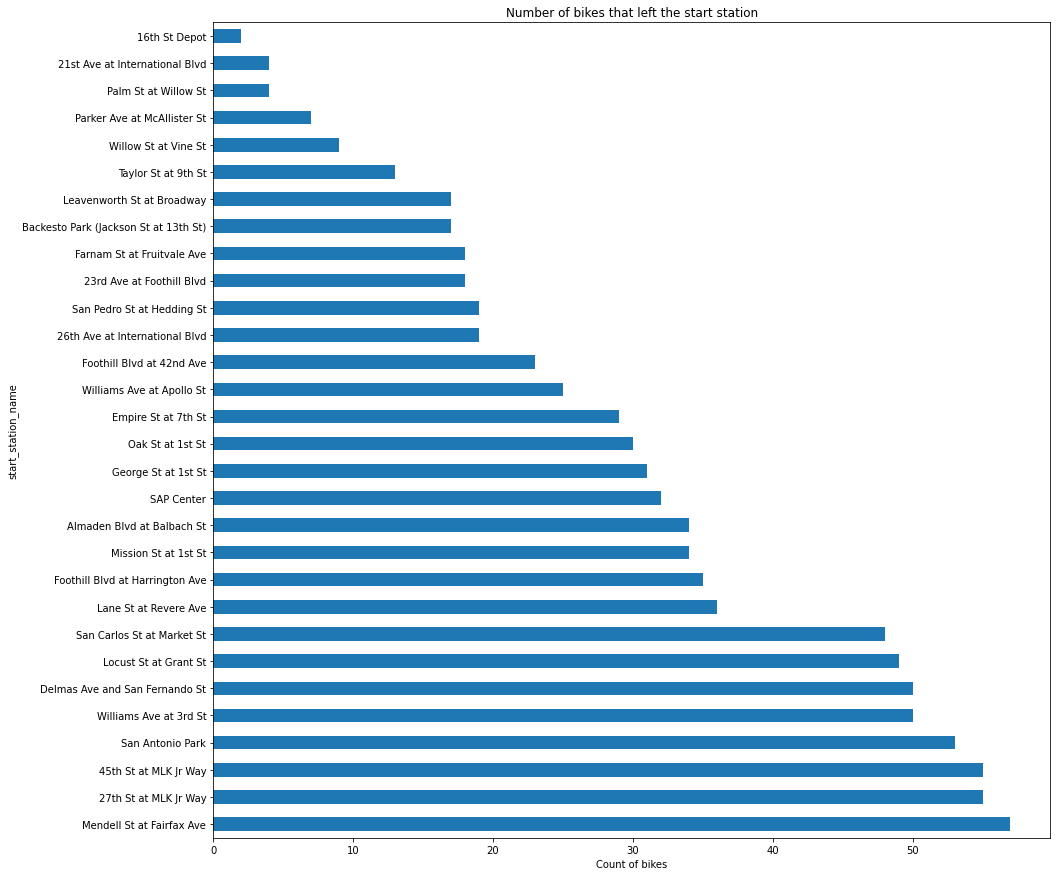

In [20]:
# Bottom 30 stations with the highest number of bikes leaving from them

fig = plt.figure(figsize = (15,15))
ax = fig.gca()
df.groupby(['start_station_name'])['duration_sec'].count().sort_values(ascending=False)[-30:].plot(kind='barh', ax=ax)
plt.xlabel('Count of bikes')
plt.title('Number of bikes that left the start station');

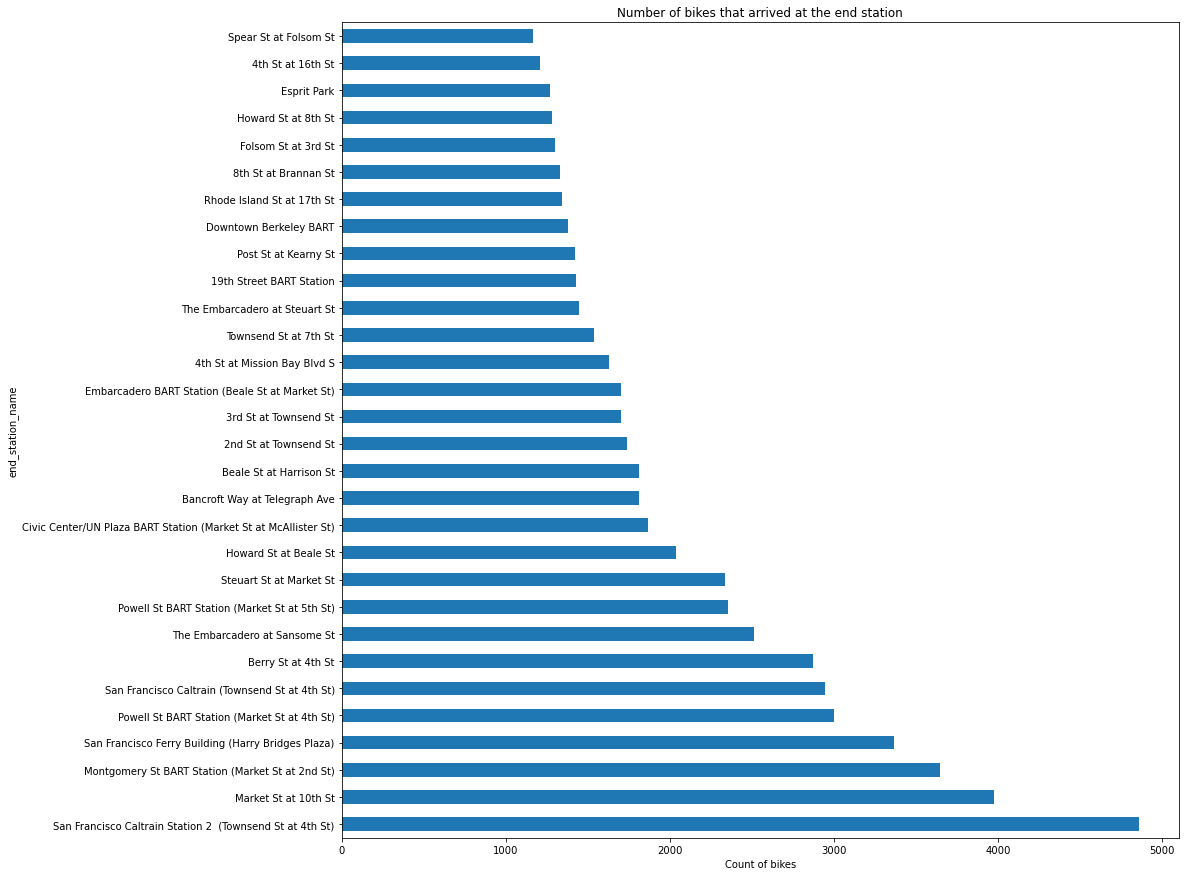

In [21]:
# Top 30 stations with the highest number of bikes arriving there

fig = plt.figure(figsize = (15,15))
ax = fig.gca()
df.groupby(['end_station_name'])['duration_sec'].count().sort_values(ascending=False)[:30].plot(kind='barh', ax=ax)
plt.xlabel('Count of bikes')
plt.title('Number of bikes that arrived at the end station');

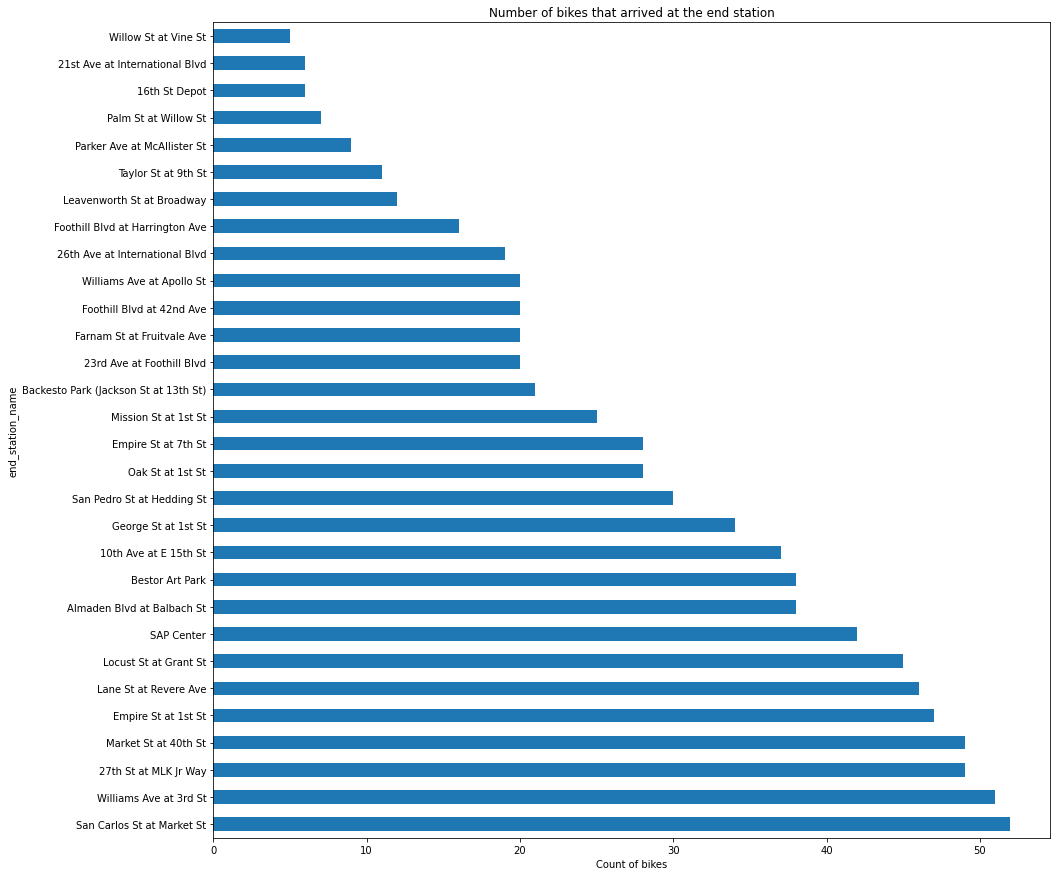

In [22]:
# Bottom 30 stations with the highest number of bikes arriving there

fig = plt.figure(figsize = (15,15))
ax = fig.gca()
df.groupby(['end_station_name'])['duration_sec'].count().sort_values(ascending=False)[-30:].plot(kind='barh', ax=ax)
plt.xlabel('Count of bikes')
plt.title('Number of bikes that arrived at the end station');

From the charts above, we see that Market St at 10th st followed by San Francisco Caltrain station 2 has the highest number of rides leaving from their stations with 16th st Depot and 21st Ave at International Blvd having the smallest number of rides leaving their stations. On the other hand, San Francisco Caltrain station 2 has the highest number of rides returning to its station and Willow St at Vine st has the least number of rides returning to it.

## Does the gender class determine the number of rides?

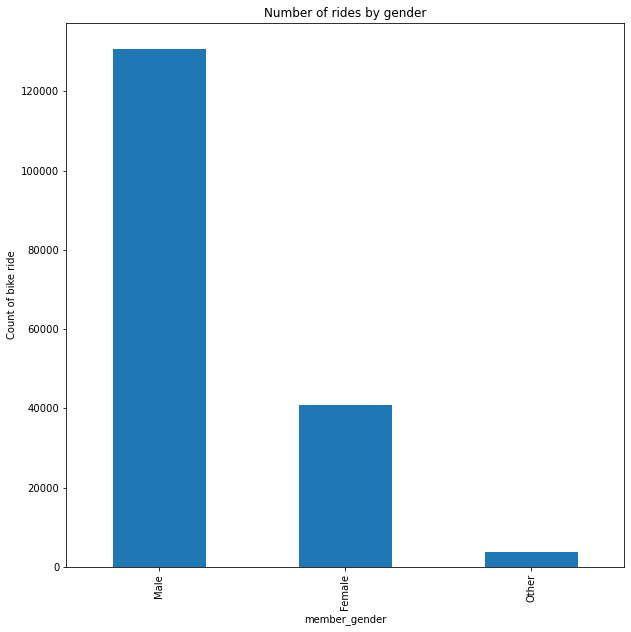

In [23]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
df.groupby(['member_gender'])['duration_sec'].count().sort_values(ascending=False).plot(kind='bar', ax=ax)
plt.ylabel('Count of bike ride')
plt.title('Number of rides by gender');

Looking at the chart above, More males mean more rides

## DO the day influence the number of rides?

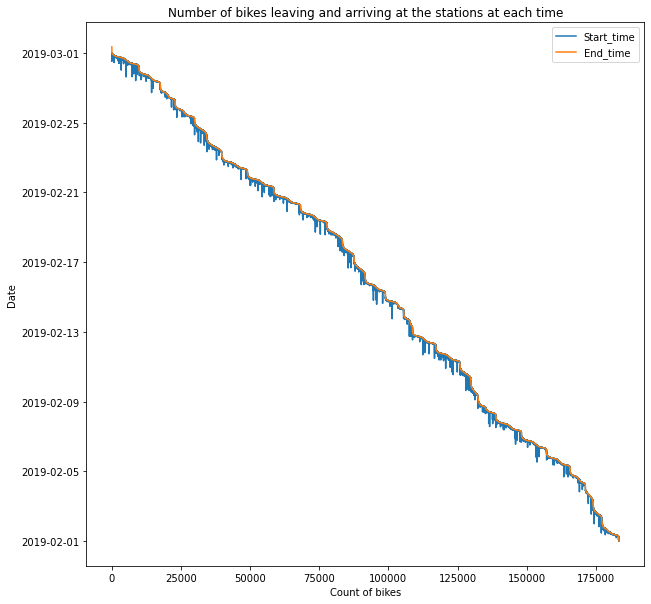

In [24]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
df.start_time.plot(kind='line', ax=ax);
df.end_time.plot(kind='line', ax=ax)
plt.xlabel('Count of bikes')
plt.ylabel('Date')
plt.legend(['Start_time', 'End_time'])
plt.title('Number of bikes leaving and arriving at the stations at each time');

From the line chart above, it is evident that the first few days recorded lesser rides than the days tending towards the end of February and begining of March.

In [25]:
# !pip install plotly

In [26]:
# import plotly.express as px

# fig = px.scatter_geo(df, lat= 'start_station_latitude', lon= 'start_station_longitude',
#                     hover_name='start_station')

# fig.show()

## The charts below looks at the distribution of individual features in the dataset.

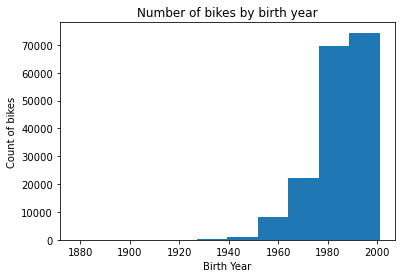

In [27]:
df['member_birth_year'].hist()
plt.grid(False)
plt.ylabel('Count of bikes')
plt.xlabel('Birth Year')
plt.title('Number of bikes by birth year');

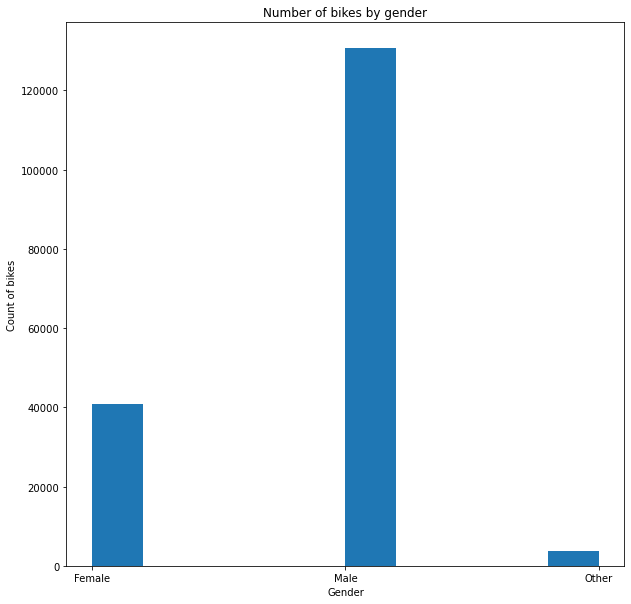

In [28]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
df['member_gender'].sort_values().hist(ax=ax);
plt.grid(False)
plt.ylabel('Count of bikes')
plt.xlabel('Gender')
plt.title('Number of bikes by gender');

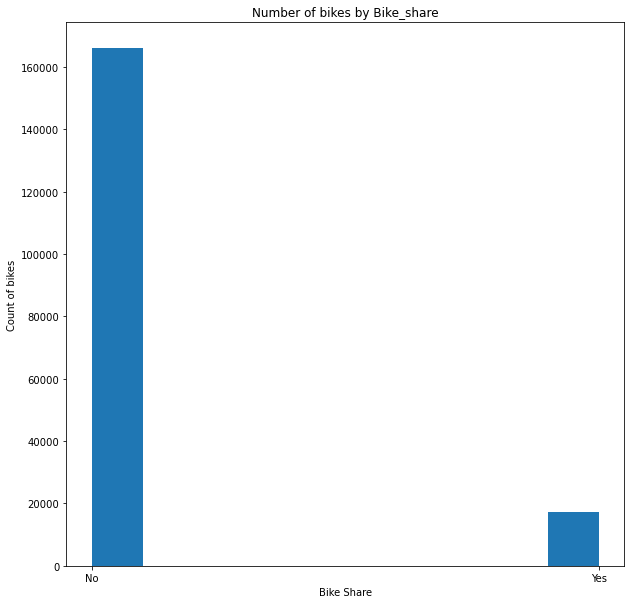

In [29]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
df['bike_share_for_all_trip'].sort_values().hist(ax=ax);
plt.grid(False)
plt.ylabel('Count of bikes')
plt.xlabel('Bike Share')
plt.title('Number of bikes by Bike_share');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> As earlier stated my main features are the duration, the start_station_id and the end_station_id or name. Looking at the graphs of these variables, I noticed there were a few outliers in the histogram of the duration which means that a few persons finished thier rides in a very long time. Hopefully further investigation would help shed light on the reason behind this. Also, I noticed some difference between the number of bikes that left and arrived at the start and end stations.
There were no transformations made to these features in other to visualize them.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The start_time and end_time were changed to type datetime as they came in as strings objects, hence I had to convert them. The outlier which could be a matter of wrong data is seen in the plot of the member_birth_year. Some members were over 200 years old which is not possible as only about 5% or less is 80 years and above according to https://censusreporter.org/profiles/16000US0667000-san-francisco-ca/ and the average age is about 38. Asides from that, the birth_year distribution is skewed to the right meaning younger people to more part in the ride than older people.
These features would throw more light on the main features for this data exploration and hence, help answer the questions outlined above

## Bivariate Exploration

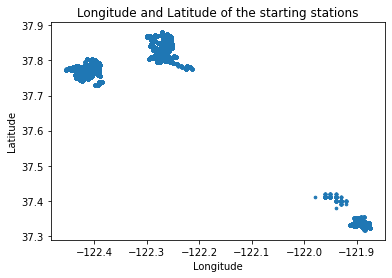

In [30]:
plt.scatter(x=df['start_station_longitude'], y=df['start_station_latitude'], s=7)
plt.rcParams["figure.figsize"] = (10,10)
plt.title('Longitude and Latitude of the starting stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [31]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip', 'Day'],
      dtype='object')

## What is the mean duration of rides per gender class?

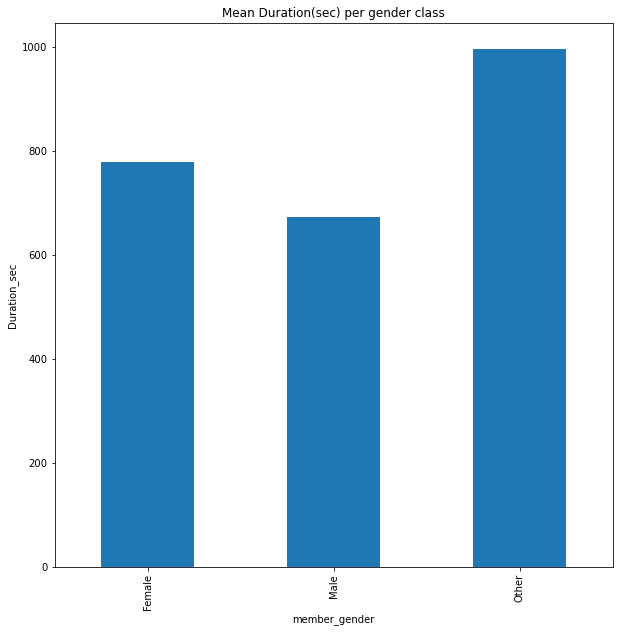

In [32]:
df.groupby('member_gender')['duration_sec'].mean().plot(kind='bar')
plt.title('Mean Duration(sec) per gender class');
plt.ylabel('Duration_sec');

The 'Other' gender class has the highest average duration of rides.

## What is the mean duration of rides for each birth year represented in the dataset?

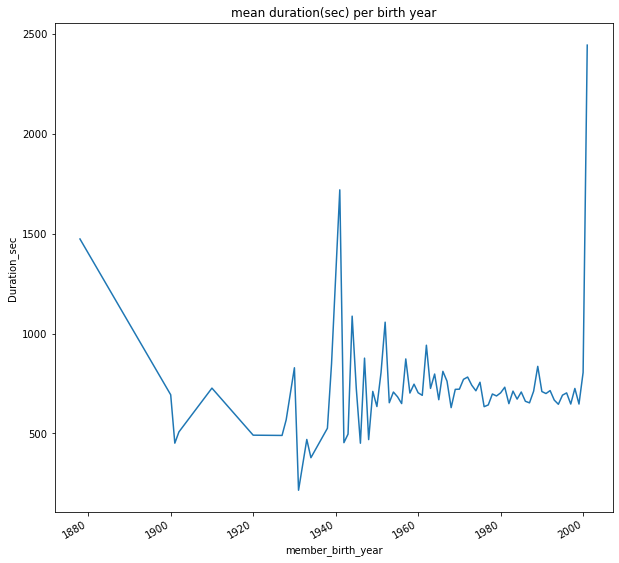

In [33]:
df.groupby('member_birth_year')['duration_sec'].mean().plot();
plt.title('mean duration(sec) per birth year');
plt.ylabel('Duration_sec');

## What is the mean duration of rides per user type?

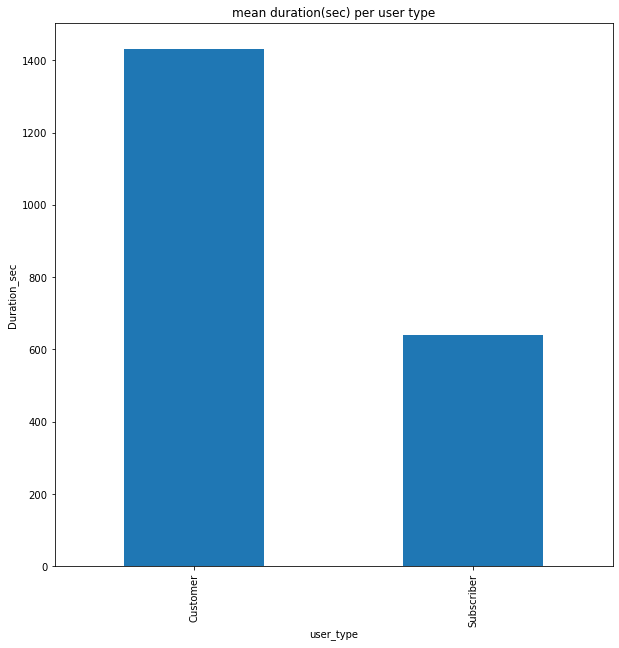

In [34]:
df.groupby('user_type')['duration_sec'].mean().plot(kind='bar');
plt.title('mean duration(sec) per user type');
plt.ylabel('Duration_sec');

Customers have a higher ride duration than subscribers

## What is the mean duration of rides per bike share option?

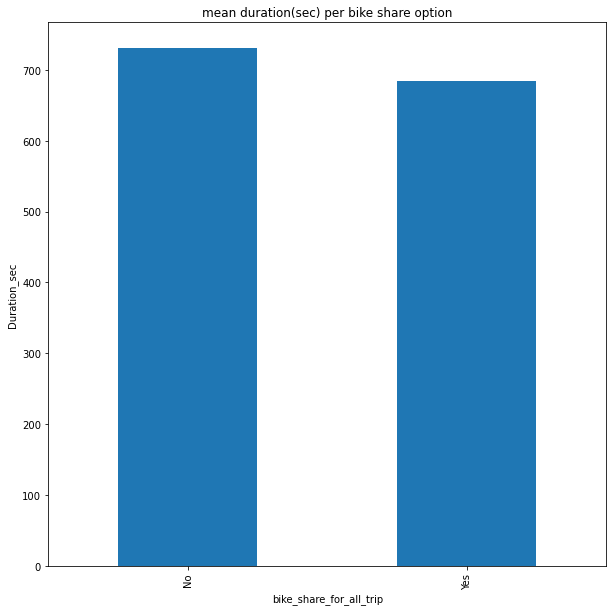

In [35]:
df.groupby('bike_share_for_all_trip')['duration_sec'].mean().plot(kind='bar');
plt.title('mean duration(sec) per bike share option');
plt.ylabel('Duration_sec');

Those who had the 'No' option had their mean duration of rides a little higher than those who had the 'Yes' option

## Does the start time influence the mean duration of rides?

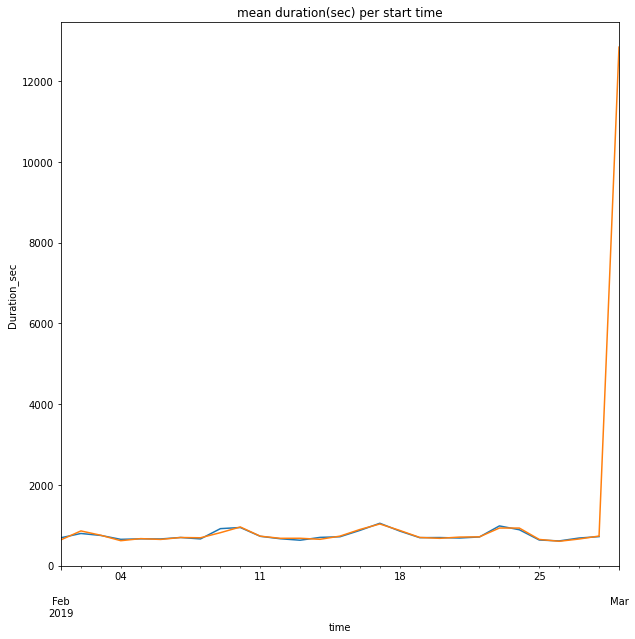

In [36]:
df_start = df.groupby('start_time')['duration_sec'].mean()
df_end = df.groupby('end_time')['duration_sec'].mean()
df_start.groupby(pd.Grouper(freq="D")).mean().plot();
df_end.groupby(pd.Grouper(freq="D")).mean().plot();

plt.title('mean duration(sec) per start time')
plt.xlabel('time');
plt.ylabel('Duration_sec');


# df1.head()

Here we notice some small cyclic movements pointing to the weekends. Meaning that a little more people took rides on weekends than weekdays.

In [37]:
less_df = df[df['duration_sec']<df.duration_sec.mean()].reset_index().drop('index', axis=1)
great_df = df[df['duration_sec']>df.duration_sec.mean()].reset_index().drop('index', axis=1)
# less_df.head()

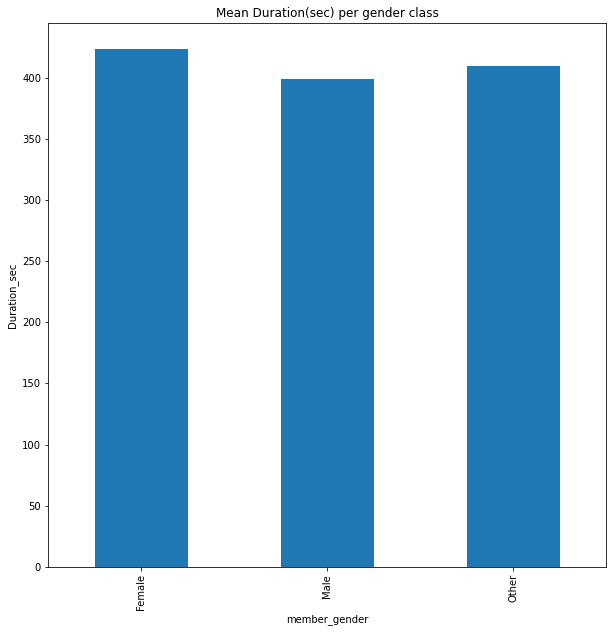

In [38]:
less_df.groupby('member_gender')['duration_sec'].mean().plot(kind='bar')
plt.title('Mean Duration(sec) per gender class');
plt.ylabel('Duration_sec');

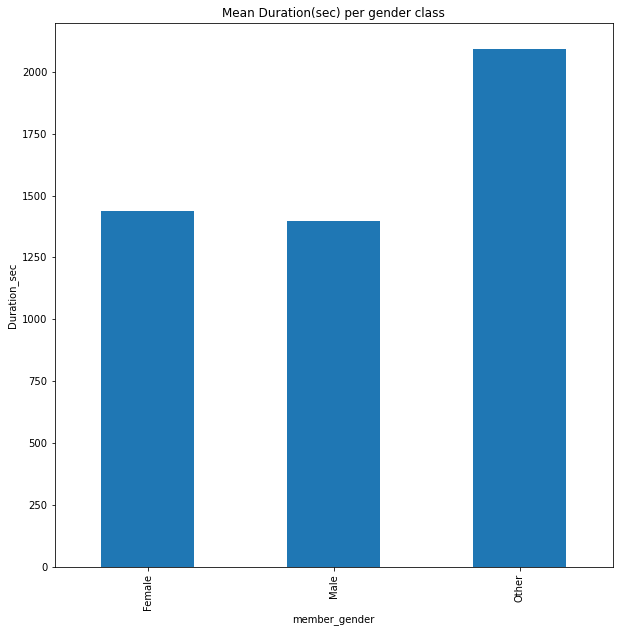

In [39]:
great_df.groupby('member_gender')['duration_sec'].mean().plot(kind='bar')
plt.title('Mean Duration(sec) per gender class');
plt.ylabel('Duration_sec');

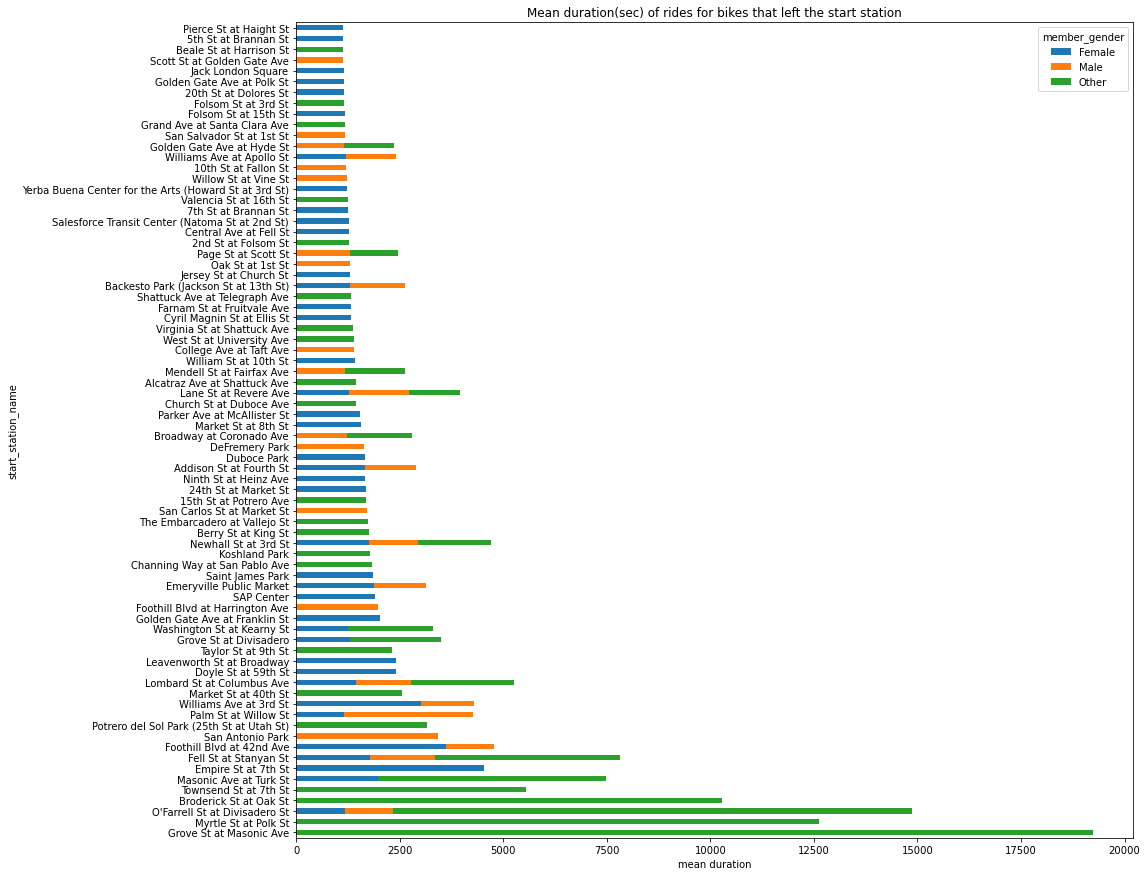

In [40]:
# Top 100 stations with the highest number of bikes leaving from them

fig = plt.figure(figsize = (15,15))
ax = fig.gca()
df.groupby(['start_station_name','member_gender'])['duration_sec'].mean().sort_values(ascending=False)[:100].unstack('member_gender').plot(kind='barh', ax=ax, stacked=True)
plt.xlabel('mean duration')
plt.title('Mean duration(sec) of rides for bikes that left the start station');

In [41]:
df.groupby(['start_station_name','member_gender'])['duration_sec'].mean().sort_values(ascending=False)

start_station_name             member_gender
Grove St at Masonic Ave        Other            19243.333333
Myrtle St at Polk St           Other            12619.076923
O'Farrell St at Divisadero St  Other            12506.200000
Broderick St at Oak St         Other            10281.875000
Townsend St at 7th St          Other             5540.727273
                                                    ...     
37th St at West St             Female             246.428571
Market St at 45th St           Other              243.000000
College Ave at Bryant Ave      Other              170.000000
Parker Ave at McAllister St    Other              145.000000
Potrero Ave and Mariposa St    Other              133.000000
Name: duration_sec, Length: 917, dtype: float64

In [42]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip', 'Day'],
      dtype='object')

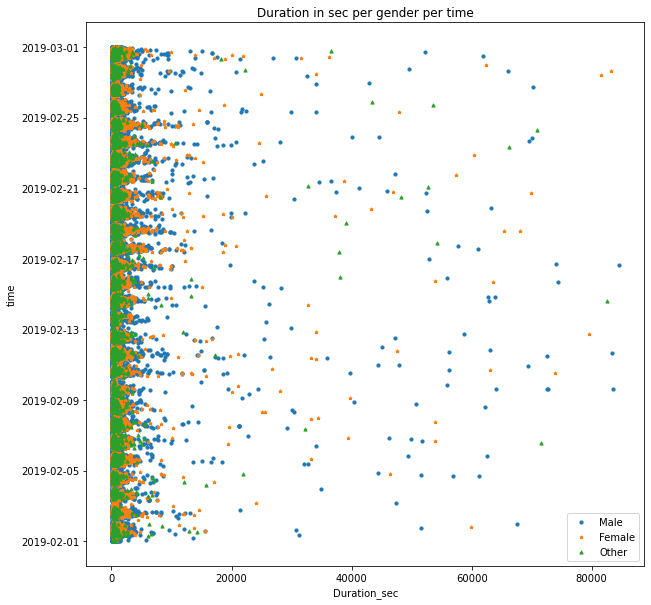

In [43]:
df_male = df[df['member_gender']=='Male'].sort_values(by='duration_sec')
df_female = df[df['member_gender']=='Female'].sort_values(by='duration_sec')
df_other = df[df['member_gender']=='Other'].sort_values(by='duration_sec')


plt.scatter(df_male['duration_sec'], df_male['start_time'],s=10,marker='o');
plt.scatter(df_female['duration_sec'], df_female['start_time'], s=10,marker='*');
plt.scatter(df_other['duration_sec'], df_other['start_time'], s=10,marker='^');

plt.title('Duration in sec per gender per time');
plt.xlabel('Duration_sec');
plt.ylabel('time');
plt.legend(['Male','Female','Other']);

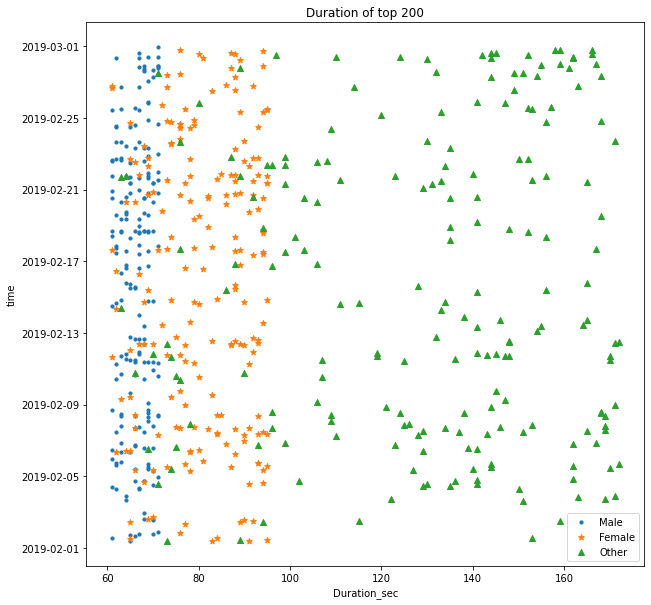

In [44]:
plt.scatter(df_male['duration_sec'][:200], df_male['start_time'][:200], s=10,marker='o');
plt.scatter(df_female['duration_sec'][:200], df_female['start_time'][:200], marker='*');
plt.scatter(df_other['duration_sec'][:200], df_other['start_time'][:200],  marker='^');

plt.title('Duration of top 200');
plt.xlabel('Duration_sec');
plt.ylabel('time');
plt.legend(['Male','Female','Other']);

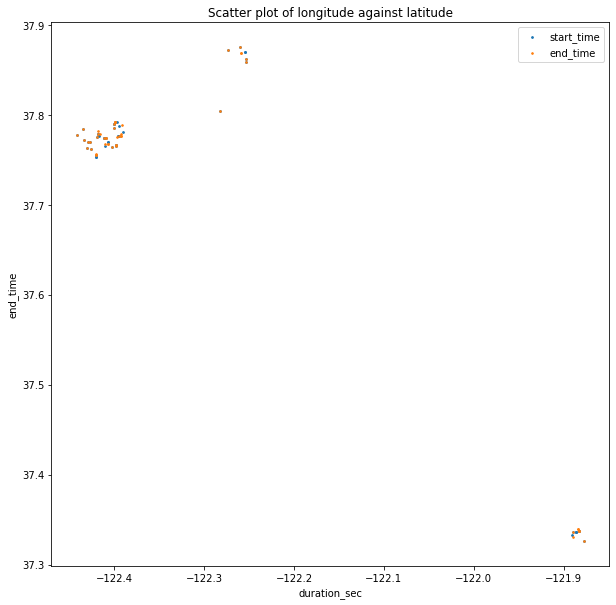

In [45]:
plt.scatter(df_male['start_station_longitude'][:50], df_male['start_station_latitude'][:50], s=3)
plt.scatter(df_male['end_station_longitude'][:50], df_male['end_station_latitude'][:50], s=2.5)
plt.title('Scatter plot of longitude against latitude');
plt.xlabel('duration_sec');
plt.ylabel('end_time');
plt.legend(['start_time', 'end_time'])

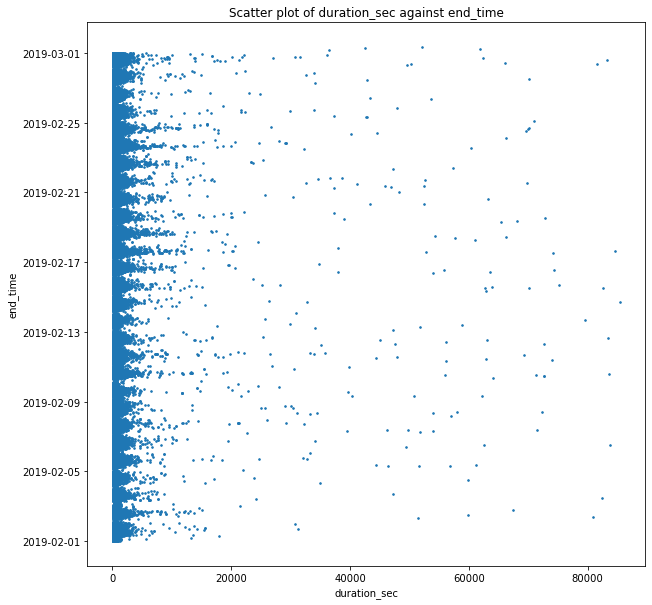

In [46]:
plt.scatter(df['duration_sec'], df['end_time'], s=2.5);
plt.title('Scatter plot of duration_sec against end_time');
plt.xlabel('duration_sec');
plt.ylabel('end_time');

In [47]:
df.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Day
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996-01-01,Male,No,Friday
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984-01-01,Male,No,Friday
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990-01-01,Male,Yes,Friday
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988-01-01,Male,No,Friday
183411,271,2019-02-01 00:00:20.636,2019-02-01 00:04:52.058,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989-01-01,Male,No,Friday


In [48]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip', 'Day'],
      dtype='object')

In [49]:
df_start.head()

start_time
2019-02-01 00:00:20.636    271.0
2019-02-01 00:04:40.616    706.0
2019-02-01 00:04:49.724    480.0
2019-02-01 00:05:34.360    139.0
2019-02-01 00:05:34.744    313.0
Name: duration_sec, dtype: float64

## Digging a little deeper into the dataset through the day

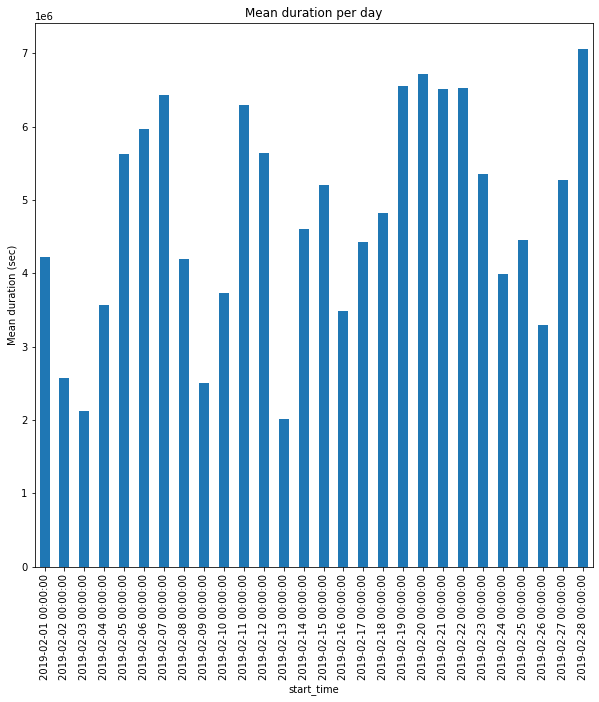

In [50]:
df_start.groupby(pd.Grouper(freq="D")).sum().plot(kind='bar');
plt.ylabel('Mean duration (sec)');
plt.title('Mean duration per day');

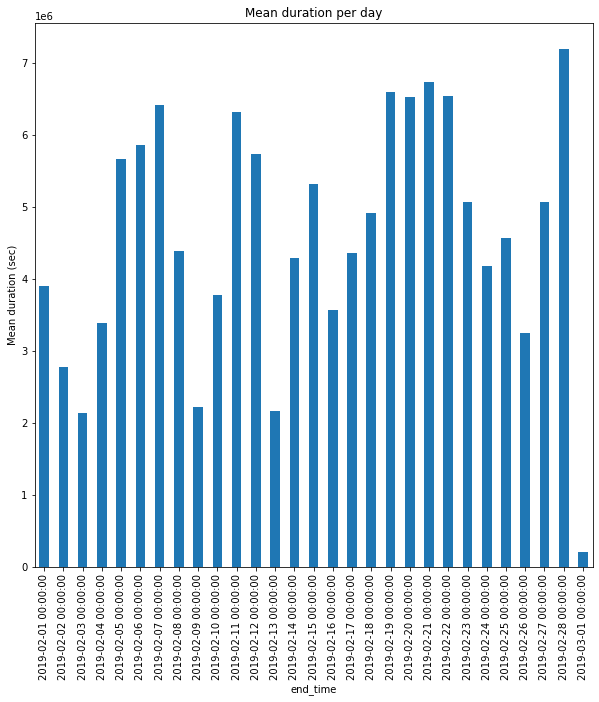

In [51]:
df_end.groupby(pd.Grouper(freq="D")).sum().plot(kind='bar');
plt.ylabel('Mean duration (sec)');
plt.title('Mean duration per day');

The two charts above show that the mean duration of rides are higher during the weekdays that the weekends.

In [52]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984-01-01,Male,No,Thursday
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaT,NaN,No,Thursday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972-01-01,Male,No,Thursday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989-01-01,Other,No,Thursday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974-01-01,Male,Yes,Thursday


## What is the count of rides per gender per day?

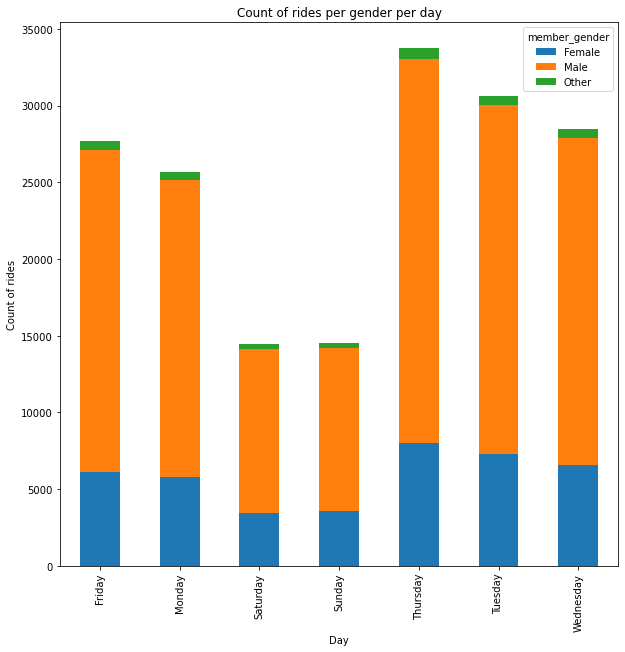

In [53]:
df.groupby(['member_gender', 'Day'])['duration_sec'].count().unstack('member_gender').sort_values(by='Day').plot(kind='bar', stacked=True);
plt.title('Count of rides per gender per day');
plt.ylabel('Count of rides');

Males had more rides across the days followed by Females 

Text(0.5, 1.0, 'Duration_sec per gender')

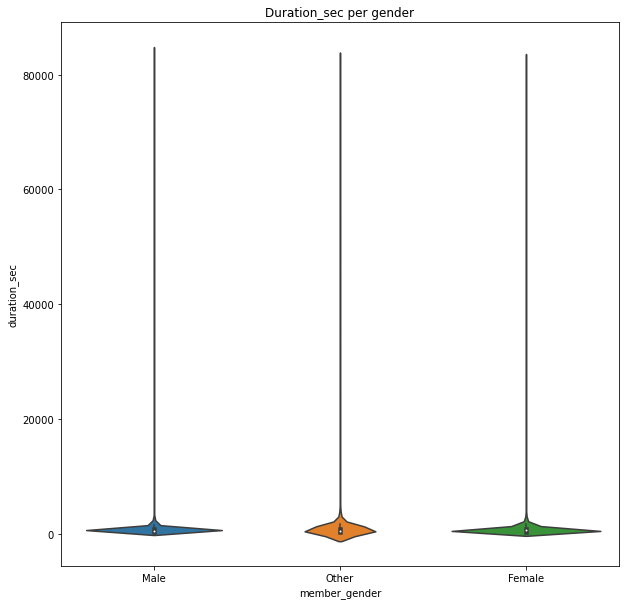

In [54]:
sb.violinplot(data=df,x='member_gender', y='duration_sec')
plt.title('Duration_sec per gender')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- Females took longer time in their rides than males although the "other" group took the longest time. This could mean females either rode loger distances or rode with less speed. Due to lack of data this can not be really understood.
- Though there was no actual relationship between the duration_sec and age except that on average those whose birth year between 1960 and 2000 have lower mean duration_sec
- Subcribers have lower mean duration_sec as well as those who have the "yes" option for  the bike share column.
- The day with the highest mean duration is the 28th of february.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I observed the following:
- Thursday is the day name with the highest count of bike rides.
- I also observed that more men rode bikes than any other gender class each day.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

Text(0.5, 1.0, 'Map of the station')

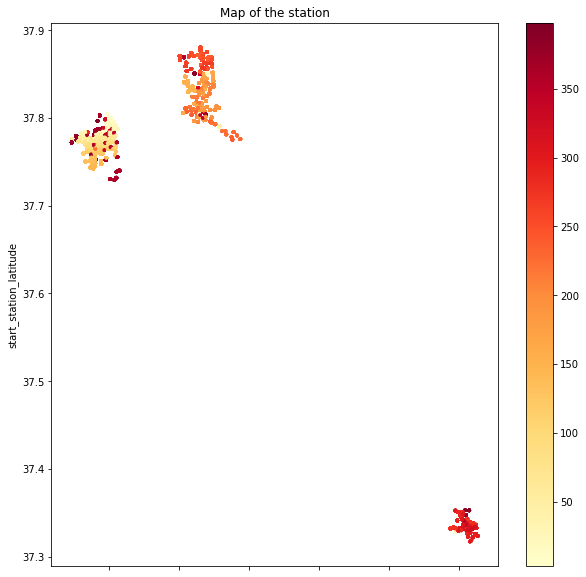

In [55]:
df.plot(x='start_station_longitude', y='start_station_latitude', kind="scatter", c=df["start_station_id"].astype(float), 
        colormap="YlOrRd", s=7)
plt.title('Map of the station')

## What is the number of rides per gender class per user type?

In the group of rides whose ride duration is less than the mean ride duration

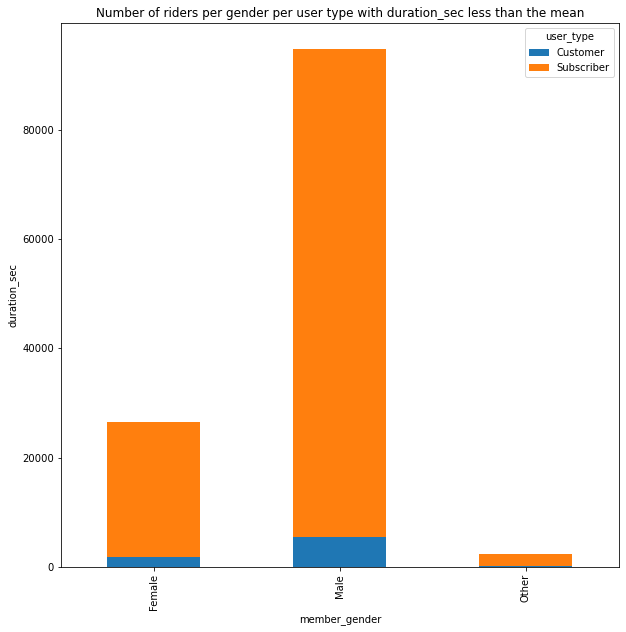

In [56]:
df_2 = less_df.groupby(['member_gender','user_type'])['duration_sec'].count().unstack('user_type')
df_2.plot(kind='bar', stacked=True);
plt.title('Number of riders per gender per user type with duration_sec less than the mean');
plt.ylabel('duration_sec');

In this group, the males still ranked top riders with the subscriber class raking high in each of gender classes

In the group of rides whose ride duration is greater than the mean ride duration

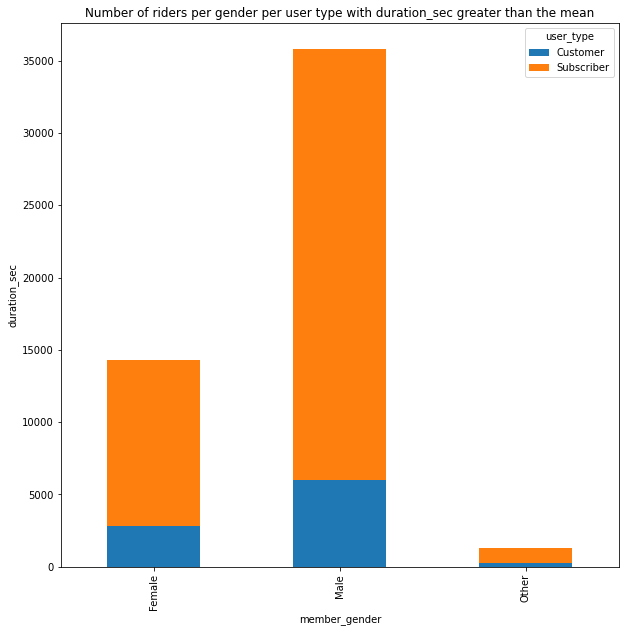

In [57]:
df_2 = great_df.groupby(['member_gender','user_type'])['duration_sec'].count().unstack('user_type')
df_2.plot(kind='bar', stacked=True);
plt.title('Number of riders per gender per user type with duration_sec greater than the mean');
plt.ylabel('duration_sec');

In this group, the males still ranked top riders with the subscriber class raking high in each of gender classes. Though more females are represented in this group.

## In the entire dataset, what is the mean ride duration per gender class per user type?

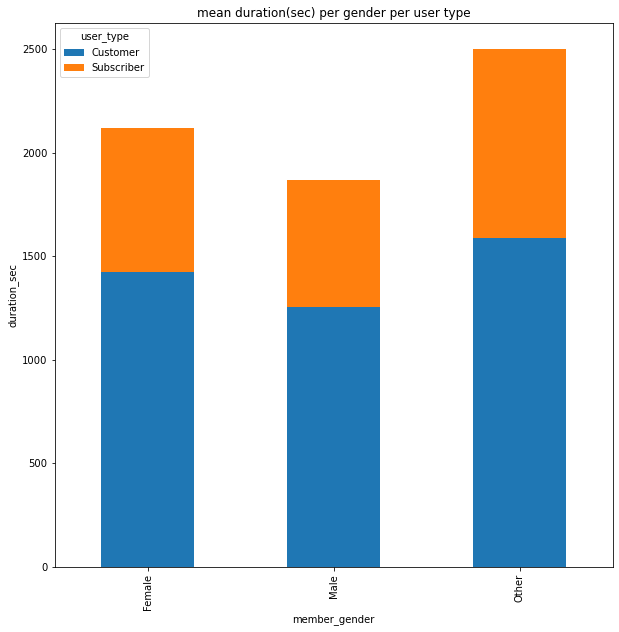

In [58]:
df_2 = df.groupby(['member_gender','user_type'])['duration_sec'].mean().unstack('user_type')
df_2.plot(kind='bar', stacked=True);
plt.title('mean duration(sec) per gender per user type');
plt.ylabel('duration_sec');

Here, the 'other' gender class has the highest mean duration of rides compared to other gender classes. 
Across the gender classes, the subscribers still have the lower mean ride duration.

## What is the mean duration per day per gender?

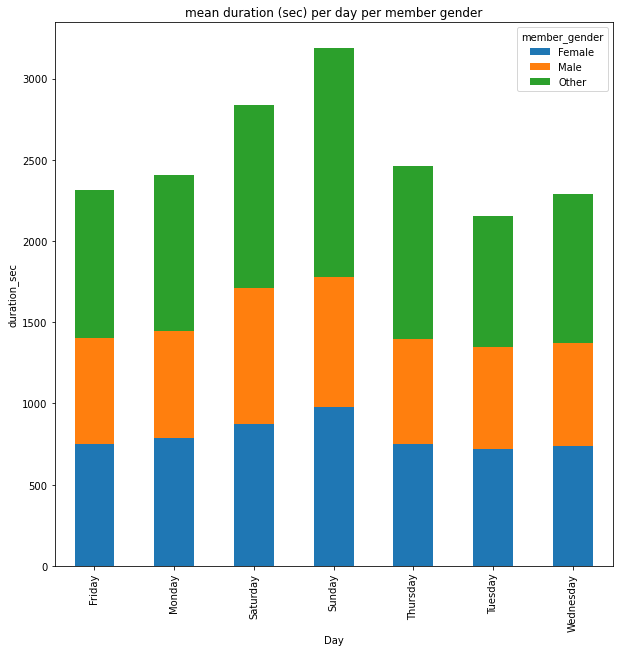

In [59]:
df.groupby(['Day', 'member_gender'])['duration_sec'].mean().unstack('member_gender').plot(kind='bar', stacked=True);
plt.title('mean duration (sec) per day per member gender');
plt.ylabel('duration_sec');

Sunday has the highest mean ride duration with the 'Other' gender class topping on that day

In [60]:
dict(df.groupby(['start_station_name'])['duration_sec'].count())

{'10th Ave at E 15th St': 57,
 '10th St at Fallon St': 353,
 '10th St at University Ave': 190,
 '11th St at Bryant St': 828,
 '11th St at Natoma St': 868,
 '13th St at Franklin St': 266,
 '14th St at Filbert St': 90,
 '14th St at Mandela Pkwy': 313,
 '14th St at Mission St': 578,
 '15th St at Potrero Ave': 630,
 '16th St Depot': 2,
 '16th St Mission BART': 512,
 '16th St Mission BART Station 2': 1031,
 '16th St at Prosper St': 453,
 '17th & Folsom Street Park (17th St at Folsom St)': 454,
 '17th St at Dolores St': 428,
 '17th St at Valencia St': 953,
 '18th St at Noe St': 553,
 '19th St at Florida St': 600,
 '19th St at Mission St': 629,
 '19th Street BART Station': 1276,
 '1st St at Folsom St': 782,
 '20th St at Bryant St': 572,
 '20th St at Dolores St': 237,
 '21st Ave at International Blvd': 4,
 '22nd St Caltrain Station': 1048,
 '22nd St at Dolores St': 289,
 '23rd Ave at Foothill Blvd': 18,
 '23rd St at San Bruno Ave': 343,
 '23rd St at Tennessee St': 795,
 '24th St at Bartlett St

## What is the number of rides per member gender per user type?

Text(0, 0.5, 'Ride count')

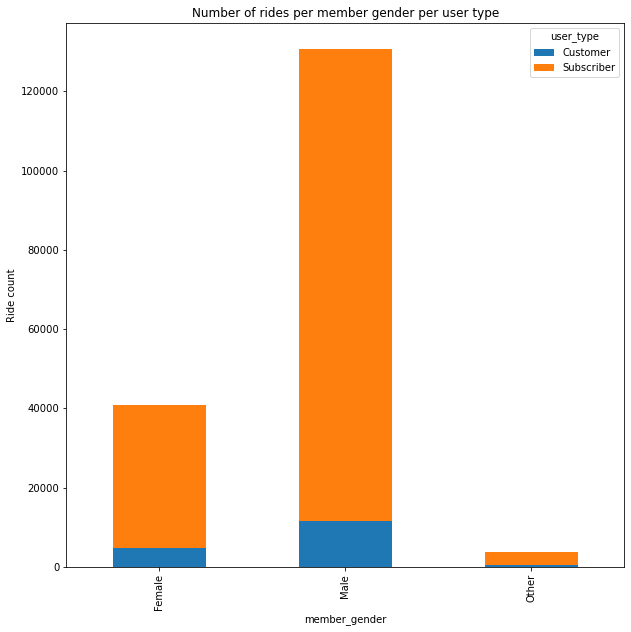

In [61]:
df_2 = df.groupby(['member_gender','user_type'])['duration_sec'].count().unstack('user_type')
# df_2.columns = df_2.columns.droplevel()
df_2.plot(kind='bar', stacked=True);
plt.title('Number of rides per member gender per user type');
plt.ylabel('Ride count')

From the visualization above we see that males still take the lead, with the subscribers topping across each gender class.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

-  Males have the highest number of rides and also the lowest mean duration.
- This was strengthened by the mean duration (sec) per day per member gender where the males had the least mean duration of rides.

### Were there any interesting or surprising interactions between features?

> There were more customers than subcribers in each gender class and the customers had low mean duration of rides in comparison to the subscribers across all the gender class. This could imply that the customers are consistent and have groomed themselves in racing.

## Conclusions


> In conclusion, this dataset has shown the the average number of men and women who took part in the bike rides within the time covered by the data. It also showed the splits over user type as well as bike share options and how these affected the duration of the rides. Though the data answered the questions outlined in the introduction, it could be improved by adding data on stops in between start_station and end_station. Also if the average speed of each ride is collected, it could improve the dataset.

> In response to the questions posed at the begining of this exploration, most rides were taken on the 28th of february, 2019. Cummulatively, Thursday ranks the day with the highest number of rides. On average, a ride could take about 726secs or being more generalistic, between 650s and 1400s and this could be influenced by the user type as subscribers have lesser mean duration than customers.
